# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Place those cities into a dataframe
cities_df = pd.DataFrame({"city": cities})

#Create empty columns for the data we want to retrieve from the API
cities_df['lat'] = ''
cities_df['lng'] = ''
cities_df['humidity'] = ''
cities_df['temp'] = ''
cities_df['clouds'] = ''
cities_df['wind'] = ''


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Grab base url
base_url = 'https://api.openweathermap.org/data/2.5/weather?q='

for index, row in cities_df.iterrows():
    
    city_search = row['city']
    
    #Create full url with imperial units
    full_url = f"{base_url}{city_search}&appid={api_key}&units=imperial"
    
    #Make the api request
    weather = requests.get(full_url).json()

    #Append values requested to the data frame
    try:
        print(f"Requesting data for {city_search}...")
        cities_df.loc[index, 'lat'] = weather['coord']['lat']
        cities_df.loc[index, 'lng'] = weather['coord']['lon']
        cities_df.loc[index, 'humidity'] = weather['main']['humidity']
        cities_df.loc[index, 'temp'] = weather['main']['temp']
        cities_df.loc[index, 'clouds'] = weather['clouds']['all']
        cities_df.loc[index, 'wind'] = weather['wind']['speed']
    #If missing values, indicate with print statement
    except(KeyError, IndexError):
        print(f"{city_search} is missing field(s) ... skipping")


Requesting data for college...
Requesting data for victoria...
Requesting data for vardo...
Requesting data for busselton...
Requesting data for romny...
Requesting data for valdemarpils...
Requesting data for vaini...
Requesting data for khatanga...
Requesting data for avarua...
Requesting data for saint anthony...
Requesting data for rikitea...
Requesting data for ribeira grande...
Requesting data for port alfred...
Requesting data for port elizabeth...
Requesting data for ipixuna...
Requesting data for hermanus...
Requesting data for ushuaia...
Requesting data for gravdal...
Requesting data for airai...
Requesting data for chicama...
Requesting data for belushya guba...
belushya guba is missing field(s) ... skipping
Requesting data for ahipara...
Requesting data for hithadhoo...
Requesting data for jiangyou...
Requesting data for vostok...
Requesting data for qaanaaq...
Requesting data for bredasdorp...
Requesting data for shimorskoye...
Requesting data for vaitupu...
vaitupu is mis

Requesting data for puerto escondido...
Requesting data for lolua...
lolua is missing field(s) ... skipping
Requesting data for qaqortoq...
Requesting data for ruwi...
Requesting data for bukachacha...
Requesting data for husavik...
Requesting data for kudahuvadhoo...
Requesting data for bubaque...
Requesting data for mehamn...
Requesting data for mys shmidta...
mys shmidta is missing field(s) ... skipping
Requesting data for marshall...
Requesting data for namatanai...
Requesting data for clyde river...
Requesting data for chuy...
Requesting data for longyearbyen...
Requesting data for pachperwa...
Requesting data for makakilo city...
Requesting data for yumen...
Requesting data for lompoc...
Requesting data for mocambique...
mocambique is missing field(s) ... skipping
Requesting data for jieshi...
Requesting data for la primavera...
Requesting data for mount gambier...
Requesting data for malanje...
Requesting data for mecca...
Requesting data for huilong...
Requesting data for buala

Requesting data for dandong...
Requesting data for ginda...
Requesting data for san remigio...
Requesting data for hervey bay...
Requesting data for pakokku...
Requesting data for ngukurr...
ngukurr is missing field(s) ... skipping
Requesting data for blanquefort...
Requesting data for adrar...
Requesting data for aklavik...
Requesting data for palencia...
Requesting data for bireun...
Requesting data for zaysan...
Requesting data for catia la mar...
Requesting data for xichang...
Requesting data for louisbourg...
louisbourg is missing field(s) ... skipping
Requesting data for rawson...
Requesting data for tel aviv-yafo...
Requesting data for harrisburg...
Requesting data for tautira...
Requesting data for sambava...
Requesting data for vestmanna...
Requesting data for siyabuswa...
Requesting data for laguna...
Requesting data for ambilobe...
Requesting data for pangkalanbuun...
Requesting data for kasongo-lunda...
Requesting data for havelock...
Requesting data for klyavlino...
Reques

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df

,city,lat,lng,humidity,temp,clouds,wind
0,college,64.8569,-147.803,63,-27.72,20,5.75
1,victoria,22.2855,114.158,85,64.8,6,5.35
2,vardo,70.3705,31.1107,74,30.2,75,20.71
3,busselton,-33.65,115.333,74,63.86,0,4
4,romny,50.751,33.4747,99,28.44,100,14.05
...,...,...,...,...,...,...,...
617,we,,,,,,
618,puri,19.8,85.85,82,62.6,0,4.09
619,alugan,12.2188,125.481,86,79.12,100,15.61
620,sinnamary,5.3833,-52.95,79,78.51,100,14.65


In [20]:
#Drop row if there is an empty string in any cell
for index, row in cities_df.iterrows():
    if (row['lat'] == '') | (row['lng'] == '') | (row['humidity'] == '') | (row['temp'] == '') | (row['clouds'] == '') | (row['wind'] == ''):
        cities_df.drop(index,inplace=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#Clear out all cities where humidity is > 100%
clean_cities_df = cities_df.loc[cities_df['humidity'] < 100, :]

clean_cities_df

,city,lat,lng,humidity,temp,clouds,wind
0,college,64.8569,-147.803,63,-27.72,20,5.75
1,victoria,22.2855,114.158,85,64.8,6,5.35
2,vardo,70.3705,31.1107,74,30.2,75,20.71
3,busselton,-33.65,115.333,74,63.86,0,4
4,romny,50.751,33.4747,99,28.44,100,14.05
...,...,...,...,...,...,...,...
616,bourg-en-bresse,46.1667,5.1667,96,49.28,100,1.01
618,puri,19.8,85.85,82,62.6,0,4.09
619,alugan,12.2188,125.481,86,79.12,100,15.61
620,sinnamary,5.3833,-52.95,79,78.51,100,14.65


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Latitude')

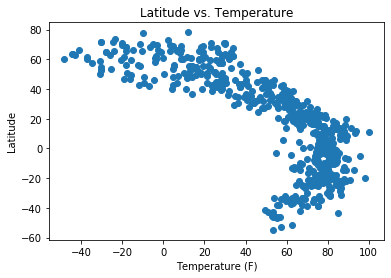

In [24]:
#Plot
plt.scatter(clean_cities_df['temp'], clean_cities_df['lat'])

#Labels, rtc
plt.title('Latitude vs. Temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Latitude')

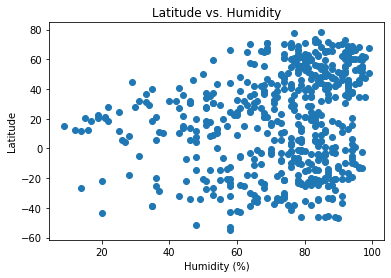

In [25]:
#Plot
plt.scatter(clean_cities_df['humidity'], clean_cities_df['lat'])

#Labels, rtc
plt.title('Latitude vs. Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Latitude')

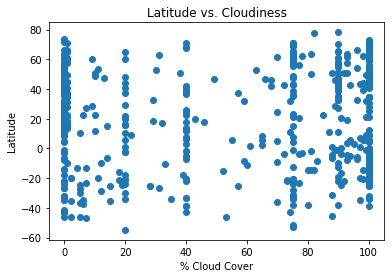

In [26]:
#Plot
plt.scatter(clean_cities_df['clouds'], clean_cities_df['lat'])

#Labels, rtc
plt.title('Latitude vs. Cloudiness')
plt.xlabel('% Cloud Cover')
plt.ylabel('Latitude')

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Latitude')

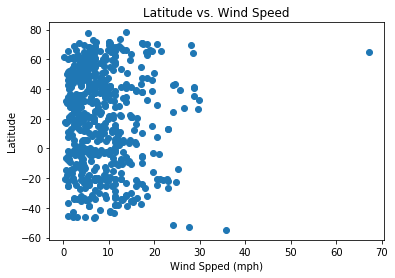

In [27]:
#Plot
plt.scatter(clean_cities_df['wind'], clean_cities_df['lat'])

#Labels, rtc
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Wind Spped (mph)')
plt.ylabel('Latitude')

## Linear Regression

In [28]:
northern_lats = clean_cities_df.loc[clean_cities_df['lat'] >= 0, :]

northern_lats

,city,lat,lng,humidity,temp,clouds,wind
0,college,64.8569,-147.803,63,-27.72,20,5.75
1,victoria,22.2855,114.158,85,64.8,6,5.35
2,vardo,70.3705,31.1107,74,30.2,75,20.71
4,romny,50.751,33.4747,99,28.44,100,14.05
5,valdemarpils,57.3707,22.5919,93,28.4,75,8.05
...,...,...,...,...,...,...,...
616,bourg-en-bresse,46.1667,5.1667,96,49.28,100,1.01
618,puri,19.8,85.85,82,62.6,0,4.09
619,alugan,12.2188,125.481,86,79.12,100,15.61
620,sinnamary,5.3833,-52.95,79,78.51,100,14.65


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression